## PREDICCIÓN - ANÁLISIS SUPERVISADO - PROBLEMA DE CLASIFICACIÓN

### PRINCIPALES PASOS A SEGUIR
1. Definir el problema
2. Adquirir la data
3. Explorar y identificar patrones en la data
4. Preparar la data
5. Modelar, predecir y solucionar el problema
6. PreseNtar los resultados

### 1. DEFINIR EL PROBLEMA

En este caso, se pide predecir si una persona sobrevivirá el naufragio del Titanic. Para esto se deberá de entrenar un modelo con parte de la data y testearlo con la otra parte de la data.

Los resultados de este modelo podrán ser usados en otros barcos para poder determinar que pasajeros tienen mayor probabilidad de sobrevivir o de no sobrevivir y realizar medidas al respecto

Dado que se tiene *labels* (etiquetas en la data), es decir podemos saber quien sobrevivió y quien no. Es un problema de análisis **supervisado**. Por otro lado, como estas etiquetas tienen solo dos clases (sobrevivió y no sobrevivió) es un problema de **clasificación**

### 2. ADQUIRIR LA DATA
- La data se encuentra en un archivo csv, por lo que se deberá de importarla
- Es importante conocer el diccionario de datos

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('data/titanic.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### Diccionario de Datos
survival -->	Sobrevivio?	    0 = No, 1 = Si  
pclass	 -->    Clase Ticket	1 = 1st, 2 = 2nd, 3 = 3rd  
sex	     -->    Sexo	  
Age	     -->    Edad en años  	
sibsp	 -->    Numero de hermanos o esposas en el barco  
parch	 -->    Número de padres o hijos en el barco  
ticket	 -->    Numero del ticket  
fare     -->	Costo del ticket  
cabin	 -->    Numero de la cabina  
embarked -->	Puerto donde embarcó  

### 3. EXPLORAR LA DATA
- Primero se describirá la información de manera general
- Luego se puede analizar específicamente algunas variables que se crean importantes
- Luego se probarán algunas hipótesis y se podrán obtener algunos *insights*

In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Bing, Mr. Lee",male,347082,G6,S
freq,1,577,7,4,644


In [6]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

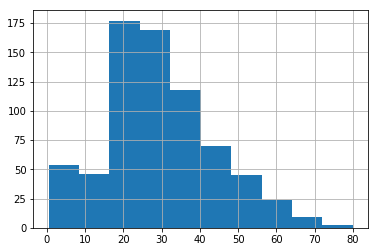

In [7]:
df['Age'].hist()

Se probarán algunas hipótesis:
- La diferencia de sobrevivencia por clase en el barco
- La diferencia de sobrevivencia por sexo
- La diferencia de sobrevivencia por si tiene familiares en el barco

In [8]:
df.groupby(['Pclass'])['Survived'].mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

In [9]:
df.groupby(['Sex'])['Survived'].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [10]:
df.groupby(['SibSp'])['Survived'].mean()

SibSp
0    0.345395
1    0.535885
2    0.464286
3    0.250000
4    0.166667
5    0.000000
8    0.000000
Name: Survived, dtype: float64

In [11]:
df.groupby(['Parch'])['Survived'].mean()

Parch
0    0.343658
1    0.550847
2    0.500000
3    0.600000
4    0.000000
5    0.200000
6    0.000000
Name: Survived, dtype: float64

In [12]:
for var in list(df.columns):
    print(var,df[var].dtype)

PassengerId int64
Survived int64
Pclass int64
Name object
Sex object
Age float64
SibSp int64
Parch int64
Ticket object
Fare float64
Cabin object
Embarked object


### 4. PREPARAR LA DATA
- El modelo solo acepta variables numéricas, por lo que las variables que son "objetos" debemos de transformarlas a números:
    - Primero la variable sexo
    - Luego la variable de embarque
    - Cabe indicar que no se usarán las variables de Nombre, Ticket ni cabina, por lo que no se transformará a numéricas
- Luego se puede crear nuevas variables
    - En este caso crearemos una variable "esta_solo". Esta tomará el valor de 1, si el pasajero no tiene familiares en el barco y 0 de otro modo
- Luego se tendrá que revisar si existen variables con valores nulos. Los modelos que revisaremos no admiten valores nulos (algunos otros si). Por lo que si tienen valores nulos se pueden eliminar esos registros o completarlos con algo (en este caso la media) 

In [13]:
df['Sex'] = df['Sex'].map({'female': 1, 'male':0}).astype(int)

In [14]:
df['Embarked_S'] = 0
df['Embarked_S'][df['Embarked']=='S'] = 1

df['Embarked_C'] = 0
df['Embarked_C'][df['Embarked']=='C'] = 1

df['Embarked_Q'] = 0
df['Embarked_Q'][df['Embarked']=='Q'] = 1

C:\Users\cgamero\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\cgamero\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\cgamero\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [15]:
df['esta_solo'] = 0
df['esta_solo'][(df['SibSp']==0)&(df['Parch']==0)] = 1

C:\Users\cgamero\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [16]:
features = ['Pclass','Sex','Age','SibSp', 'Parch','Fare','esta_solo','Embarked_S','Embarked_C','Embarked_Q']

In [17]:
for var in features:
    print(var, len(df[df[var].isnull()]))

Pclass 0
Sex 0
Age 177
SibSp 0
Parch 0
Fare 0
esta_solo 0
Embarked_S 0
Embarked_C 0
Embarked_Q 0


In [18]:
df['Age'] = df['Age'].fillna(df['Age'].mean())

In [19]:
for var in features:
    print(var, len(df[df[var].isnull()]))

Pclass 0
Sex 0
Age 0
SibSp 0
Parch 0
Fare 0
esta_solo 0
Embarked_S 0
Embarked_C 0
Embarked_Q 0


### 5. MODELO
- Para realizar el modelo, primero se tiene que dividir la base de datos en dos: data de entrenamiento y data de test. En este caso la data de test será el 20% del total
- Luego para cada una de estas dos "bases de datos" se tendrán que dividir en las **"X"** (o features o variables independientes) y las **"Y"** (o target o variable dependiente)
- Luego se tendrá que elegir que modelo usar, en este caso usaremos los arboles de clasificación
- Luego se entrenará el modelo con la data de entrenamiento

In [20]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size = 0.2)

In [21]:
features = ['Pclass','Sex','Age','SibSp', 'Parch','Fare','esta_solo',
            'Embarked_S','Embarked_C','Embarked_Q']

target = ['Survived']

In [22]:
X_train = train[features]
y_train = train[target]
X_test = test[features]
y_test = test[target]

In [33]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(max_depth = 4)

In [34]:
clf = clf.fit(X_train, y_train)

### 6. PRESENTAR RESULTADOS
- Luego se procederá a evaluar el modelo
- Primero se evaluará el modelo en la data de entrenamiento
- Luego se evaluará el modelo en la data de test

In [35]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [36]:
confusion_matrix(y_train, clf.predict(X_train))

array([[356,  74],
       [ 49, 233]])

In [37]:
accuracy_score(y_train, clf.predict(X_train))

0.827247191011236

In [38]:
confusion_matrix(y_test, clf.predict(X_test))

array([[90, 29],
       [10, 50]])

In [39]:
accuracy_score(y_test, clf.predict(X_test))

0.78212290502793291

In [40]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

In [42]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Embarked_S',
       'Embarked_C', 'Embarked_Q', 'esta_solo'],
      dtype='object')

In [58]:
len(X_train[X_train['Age']<4])

24

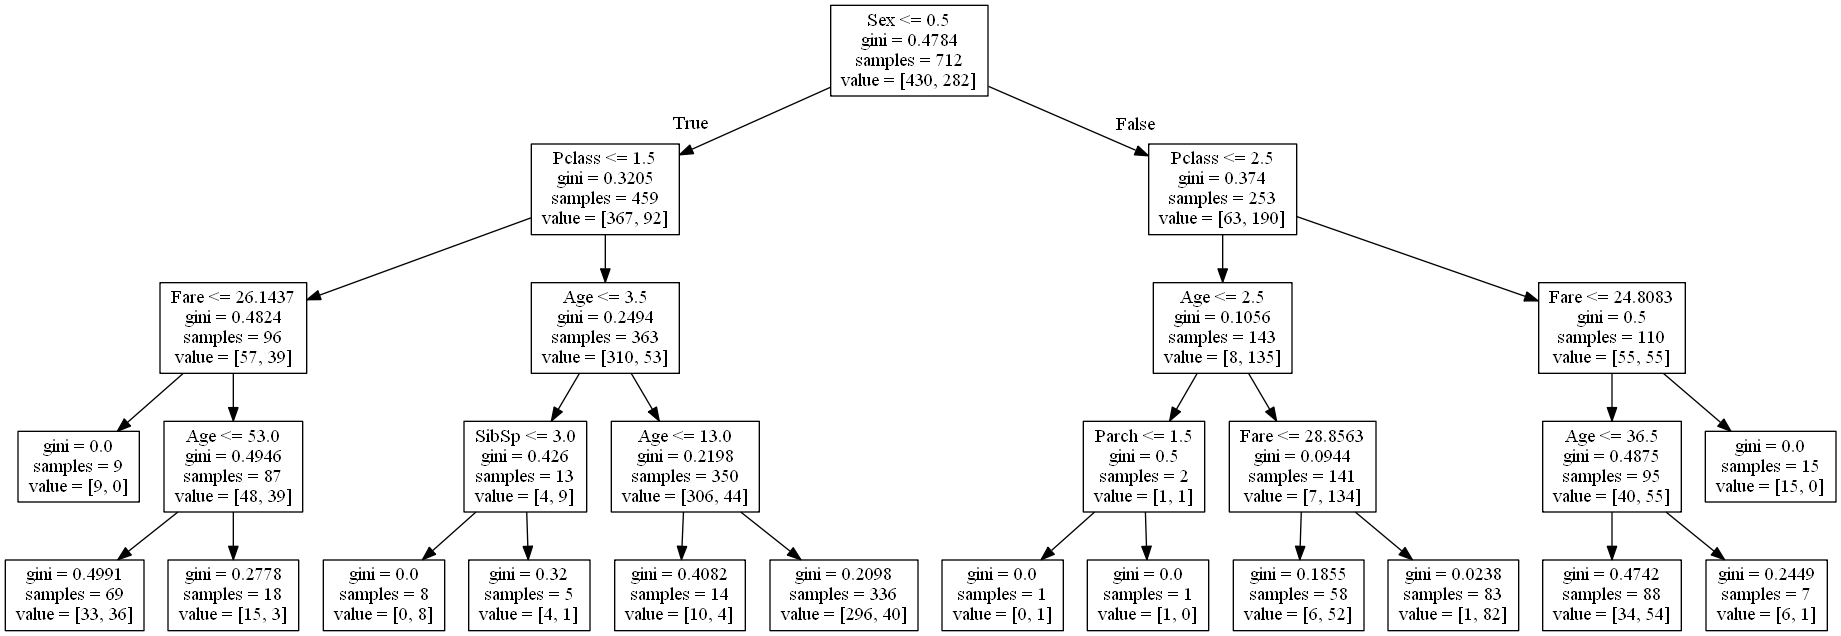

In [54]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data, 
                feature_names = features)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [53]:
from collections import Counter
print(len(y_train))
y_train.sum()


712


Survived    282
dtype: int64